In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 解决了中文显示问题 ---
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 在您的代码开头添加
plt.rcParams.update({'font.size': 14,          # 基础字体大小
                     'axes.titlesize': 18,    # 标题字体大小
                     'axes.labelsize': 16,    # 轴标签字体大小
                     'xtick.labelsize': 12,   # X轴刻度标签大小
                     'ytick.labelsize': 12,   # Y轴刻度标签大小
                     'legend.fontsize': 12}) # 图例字体大小

# 一、了解数据集

In [4]:
data = pd.read_csv("C:\\Users\\Pallette\\Desktop\\Sta\\Course\\Work\\com\\com.csv")
data.head()

,bianh,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,...,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,...,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...,NaN,NaN,NaN,NaN,NaN
1,1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,...,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...,NaN,NaN,NaN,NaN,NaN
2,1,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,...,行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,...,现金流断裂 行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,...,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bianh         6272 non-null   int64  
 1   com_name      6272 non-null   object 
 2   com_addr      6272 non-null   object 
 3   cat           6272 non-null   object 
 4   se_cat        6271 non-null   object 
 5   com_des       6271 non-null   object 
 6   born_data     6272 non-null   object 
 7   death_data    6272 non-null   object 
 8   live_days     6272 non-null   int64  
 9   financing     6272 non-null   object 
 10  total_money   805 non-null    float64
 11  death_reason  1419 non-null   object 
 12  invest_name   600 non-null    object 
 13  ceo_name      4839 non-null   object 
 14  ceo_des       4838 non-null   object 
 15  ceo_per_des   4839 non-null   object 
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [8]:
#可以发现data中最后5列为空，将其删去
data.drop(data.columns[-5:],axis = 1,inplace = True)

In [10]:
#查看公司存活时间以及总资产相关数据，可以发现数据集中有错误（即存活时间为负数的数据）
#去除存活时间为负数的数据
data = data[data['live_days']>0]

In [12]:
data.columns

Index(['bianh', 'com_name', 'com_addr', 'cat', 'se_cat', 'com_des',
       'born_data', 'death_data', 'live_days', 'financing', 'total_money',
       'death_reason', 'invest_name', 'ceo_name', 'ceo_des', 'ceo_per_des'],
      dtype='object')

In [14]:
data.shape

(6271, 16)

In [16]:
data.isnull().sum()
#查看空值情

bianh              0
com_name           0
com_addr           0
cat                0
se_cat             1
com_des            1
born_data          0
death_data         0
live_days          0
financing          0
total_money     5466
death_reason    4852
invest_name     5671
ceo_name        1433
ceo_des         1434
ceo_per_des     1433
dtype: int64

In [18]:
#由于要分析倒闭原因，对于倒闭原因为空的地方我们选择填充‘未知’
data['death_reason'] = data['death_reason'].fillna('未知')
data.isnull().sum()

bianh              0
com_name           0
com_addr           0
cat                0
se_cat             1
com_des            1
born_data          0
death_data         0
live_days          0
financing          0
total_money     5466
death_reason       0
invest_name     5671
ceo_name        1433
ceo_des         1434
ceo_per_des     1433
dtype: int64

In [20]:
#查看倒闭公司分布的地区
data.groupby('com_addr').com_addr.count().sort_values(ascending=False)

com_addr
北京     2238
广东     1095
上海     1033
浙江      395
四川      282
江苏      253
福建      140
湖北      117
山东       83
陕西       79
重庆       72
河南       54
湖南       52
安徽       51
天津       45
辽宁       42
台湾       36
北美洲      23
香港       21
广西       20
河北       19
云南       18
黑龙江      17
贵州       14
江西       13
海南       10
亚洲       10
山西        9
吉林        7
内蒙古       6
甘肃        4
新疆        3
宁夏        3
欧洲        3
西藏        2
北京        1
青海        1
Name: com_addr, dtype: int64

In [22]:
import datetime
data['death_year'] = pd.to_datetime(data['death_data']).dt.year
data['death_month'] = pd.to_datetime(data['death_data']).dt.month

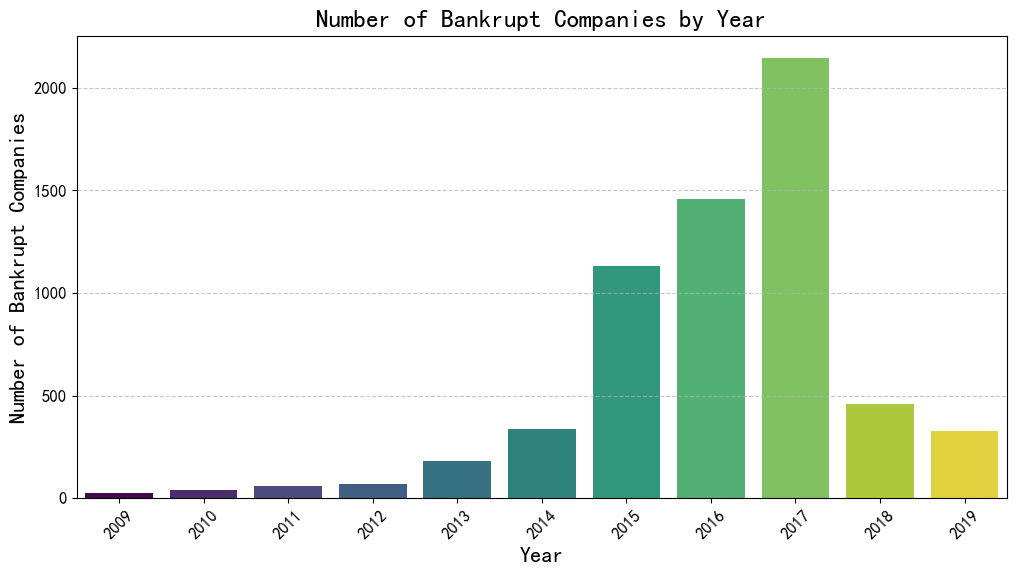

In [24]:
# --- 时间维度分析 ---
death_by_year = data['death_year'].value_counts().sort_index()[8:]

plt.figure(figsize=(12, 6))
sns.barplot(x=death_by_year.index, y=death_by_year.values, palette="viridis", hue=death_by_year.index, legend=False)
plt.title('Number of Bankrupt Companies by Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Bankrupt Companies', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Eng_1-1")
plt.show()

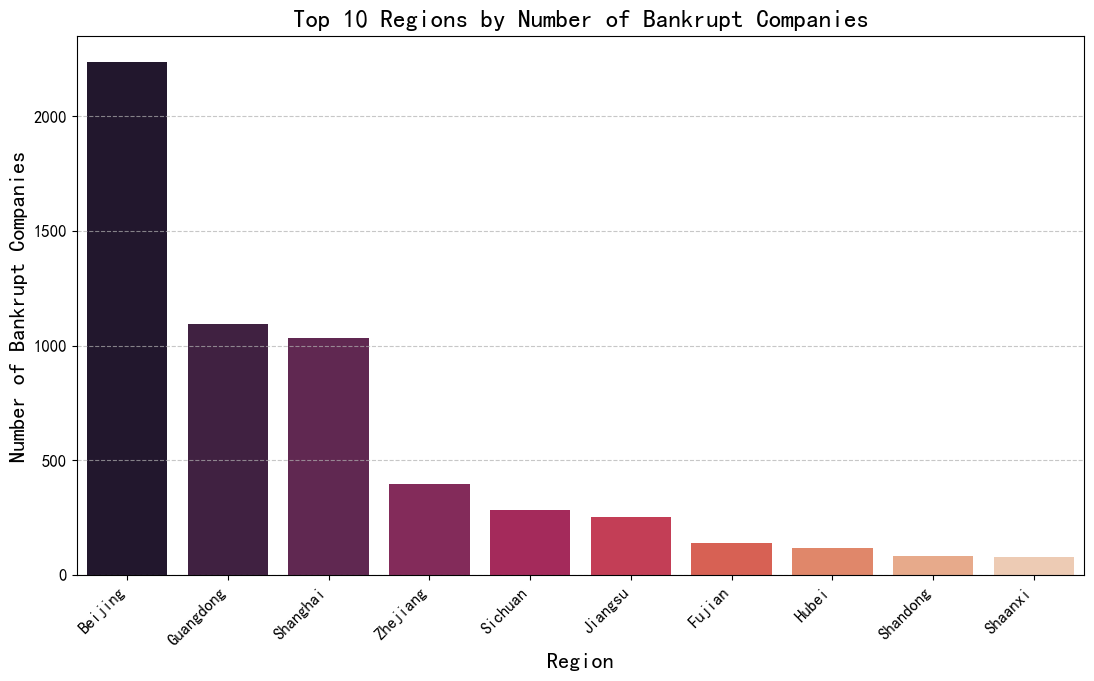

In [25]:
# 地域维度分析
addr_counts = data['com_addr'].value_counts().head(10)

# --- 1. 创建中英地名映射字典 ---
region_translation = {
    '北京': 'Beijing',
    '广东': 'Guangdong',
    '上海': 'Shanghai',
    '浙江': 'Zhejiang',
    '四川': 'Sichuan',
    '江苏': 'Jiangsu',
    '福建': 'Fujian',
    '湖北': 'Hubei', 
    '山东': 'Shandong',
    '陕西': 'Shaanxi',
}
english_labels = [region_translation.get(region, region) for region in addr_counts.index]


plt.figure(figsize=(13, 7))
sns.barplot(x=addr_counts.index, y=addr_counts.values, palette="rocket", hue=addr_counts.index, legend=False)
plt.xticks(ticks=range(len(addr_counts.index)), labels=english_labels, rotation=45, ha='right')

plt.title('Top 10 Regions by Number of Bankrupt Companies', fontsize=18)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Bankrupt Companies', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Eng_1-2")
plt.show()

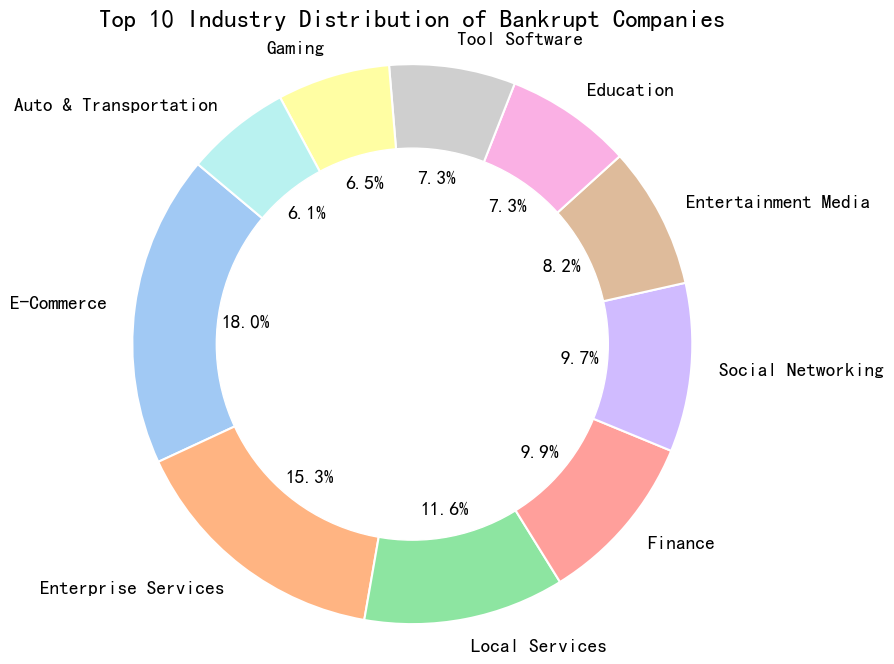

In [26]:
import seaborn as sns

# --- 行业维度分析---
cat_counts = data['cat'].value_counts().head(10)
colors = sns.color_palette("pastel", n_colors=len(cat_counts))

industry_translation = {
    '电子商务': 'E-Commerce',
    '企业服务': 'Enterprise Services',
    '本地生活': 'Local Services',
    '金融': 'Finance',
    '社交网络': 'Social Networking',
    '文娱传媒': 'Entertainment Media',
    '教育': 'Education',
    '工具软件': 'Tool Software',
    '游戏': 'Gaming',
    '汽车交通': 'Auto & Transportation',
}
english_labels = [industry_translation.get(cat, cat) for cat in cat_counts.index]

plt.figure(figsize=(10, 8))
plt.pie(cat_counts,
        labels=english_labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
       textprops={'fontsize': 14})

my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gca()
p.add_artist(my_circle)

# --- 3. 标题和路径英文化 ---
plt.title('Top 10 Industry Distribution of Bankrupt Companies', fontsize=18)
plt.axis('equal')
plt.savefig("Eng_1-3")
plt.show()

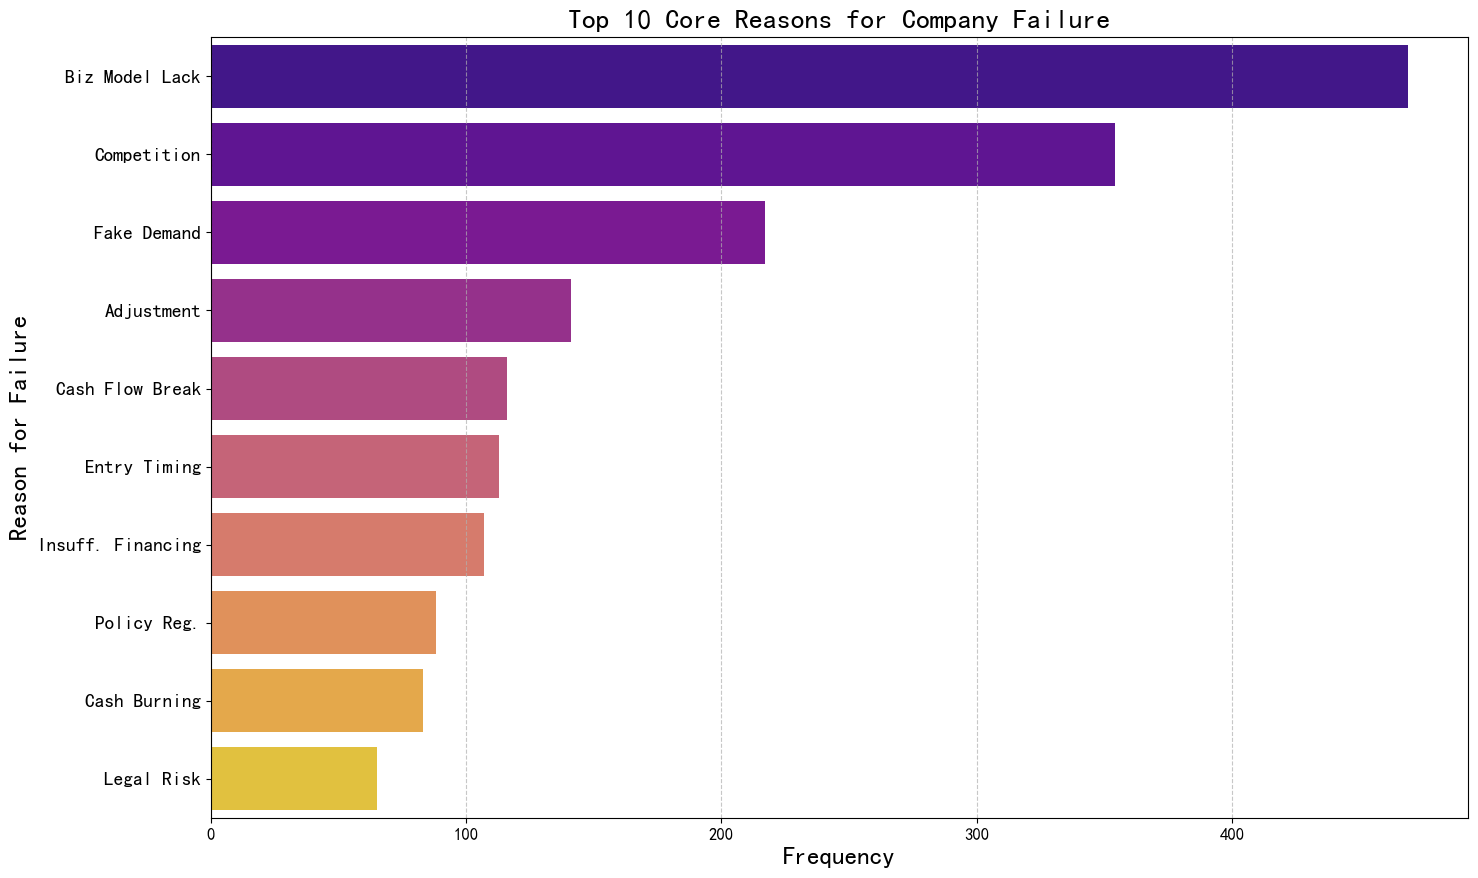

In [28]:
import seaborn as sns

# --- 倒闭原因维度分析 ---
reasons_s = data['death_reason'].str.split(' ').explode()
reason_counts = reasons_s.value_counts().drop('未知').head(10)

reason_translation_short = {
    '商业模式匮乏': 'Biz Model Lack',
    '行业竞争': 'Competition',
    '市场伪需求': 'Fake Demand',
    '业务调整': 'Adjustment',
    '现金流断裂': 'Cash Flow Break',
    '产品入场时机': 'Entry Timing',
    '融资能力不足': 'Insuff. Financing',
    '政策监管': 'Policy Reg.',
    '烧钱': 'Cash Burning',
    '法律法规风险': 'Legal Risk',
}
english_labels_short = [reason_translation_short.get(reason, reason) for reason in reason_counts.index]

plt.figure(figsize=(15, 9)) 
ax = plt.gca()

sns.barplot(x=reason_counts.values, y=reason_counts.index, palette="plasma", orient='h', hue=reason_counts.index, legend=False, ax=ax)

# --- 2. 设置简短的英文标签和字体大小 ---
ax.set_yticks(range(len(reason_counts)))
ax.set_yticklabels(english_labels_short, fontsize=14) 

# --- 3. 标题、坐标轴和路径英文化 (增大字体) ---
plt.title('Top 10 Core Reasons for Company Failure', fontsize=20) 
plt.xlabel('Frequency', fontsize=18) 
plt.ylabel('Reason for Failure', fontsize=18) 
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.savefig("Eng_1-4")
plt.show()

# 二、深度特征工程

In [30]:
# 1. 对融资轮次进行有序编码
# 融资轮次反映了公司的成熟度和市场认可度，是一个有序变量
financing_map = {
    '尚未获投': 0, '种子轮': 1, '天使轮': 2,
    'Pre-A轮': 3, 'A轮': 4, 'A+轮': 5,
    'B轮': 6, 'B+轮': 7, 'C轮': 8,
    'D轮': 9, 'E轮': 10, '战略投资': 11, '已被收购': 12, '不明确': 0
}
data['financing_level'] = data['financing'].map(financing_map).fillna(0)

In [35]:
# 2. 对融资金额进行处理
# 创建一个二进制变量表示是否获得投资
data['has_funding'] = data['total_money'].notna().astype(int)
# 对有融资金额的数据取对数，以减小极端值的影响
data['log_total_money'] = np.log1p(data['total_money'].fillna(0))

In [37]:
# 3. 对公司地址进行简化处理
# 将公司地址简化为几个主要地区，其余归为'其他'
top_cities = data['com_addr'].value_counts().nlargest(5).index
data['addr_group'] = data['com_addr'].apply(lambda x: x if x in top_cities else '其他')

In [39]:
# 4. 对公司类别进行简化处理
top_cats = data['cat'].value_counts().nlargest(5).index
data['cat_group'] = data['cat'].apply(lambda x: x if x in top_cats else '其他')

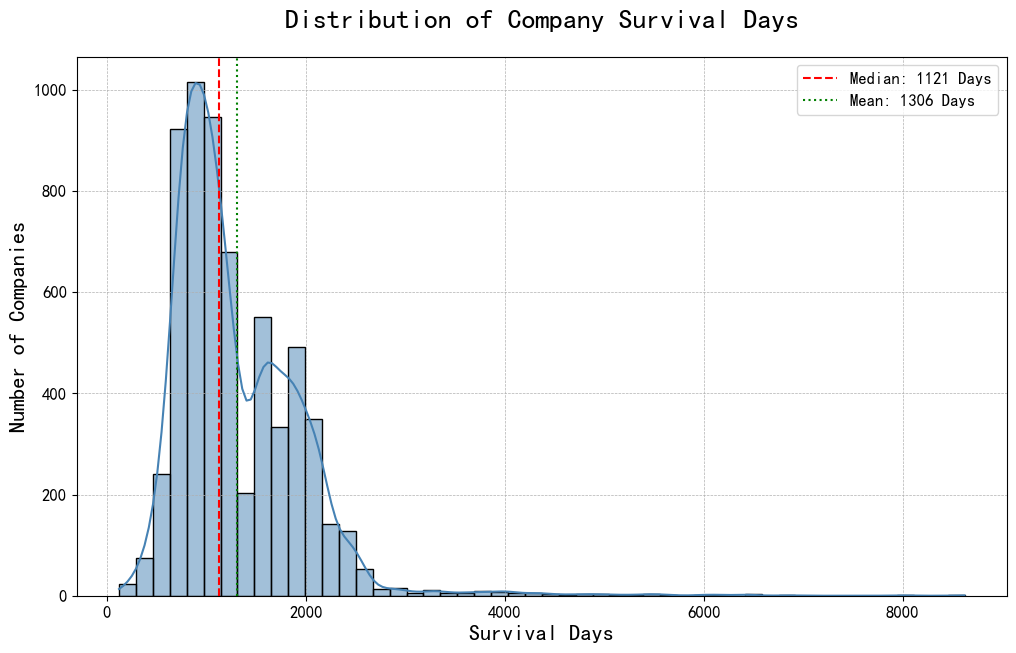

In [41]:
plt.figure(figsize=(12, 7))
sns.histplot(data['live_days'], kde=True, color='steelblue', bins=50)

# --- 1. 标题、坐标轴英文化 ---
plt.title('Distribution of Company Survival Days', fontsize=20, weight='bold', pad=20)
plt.xlabel('Survival Days', fontsize=16)
plt.ylabel('Number of Companies', fontsize=16)

# --- 2. 图例英文化 ---
median_val = data['live_days'].median()
mean_val = data['live_days'].mean()

plt.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.0f} Days')
plt.axvline(mean_val, color='green', linestyle=':', label=f'Mean: {mean_val:.0f} Days')

plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- 3. 保存路径英文化 ---
plt.savefig("Eng_2-1")
plt.show()

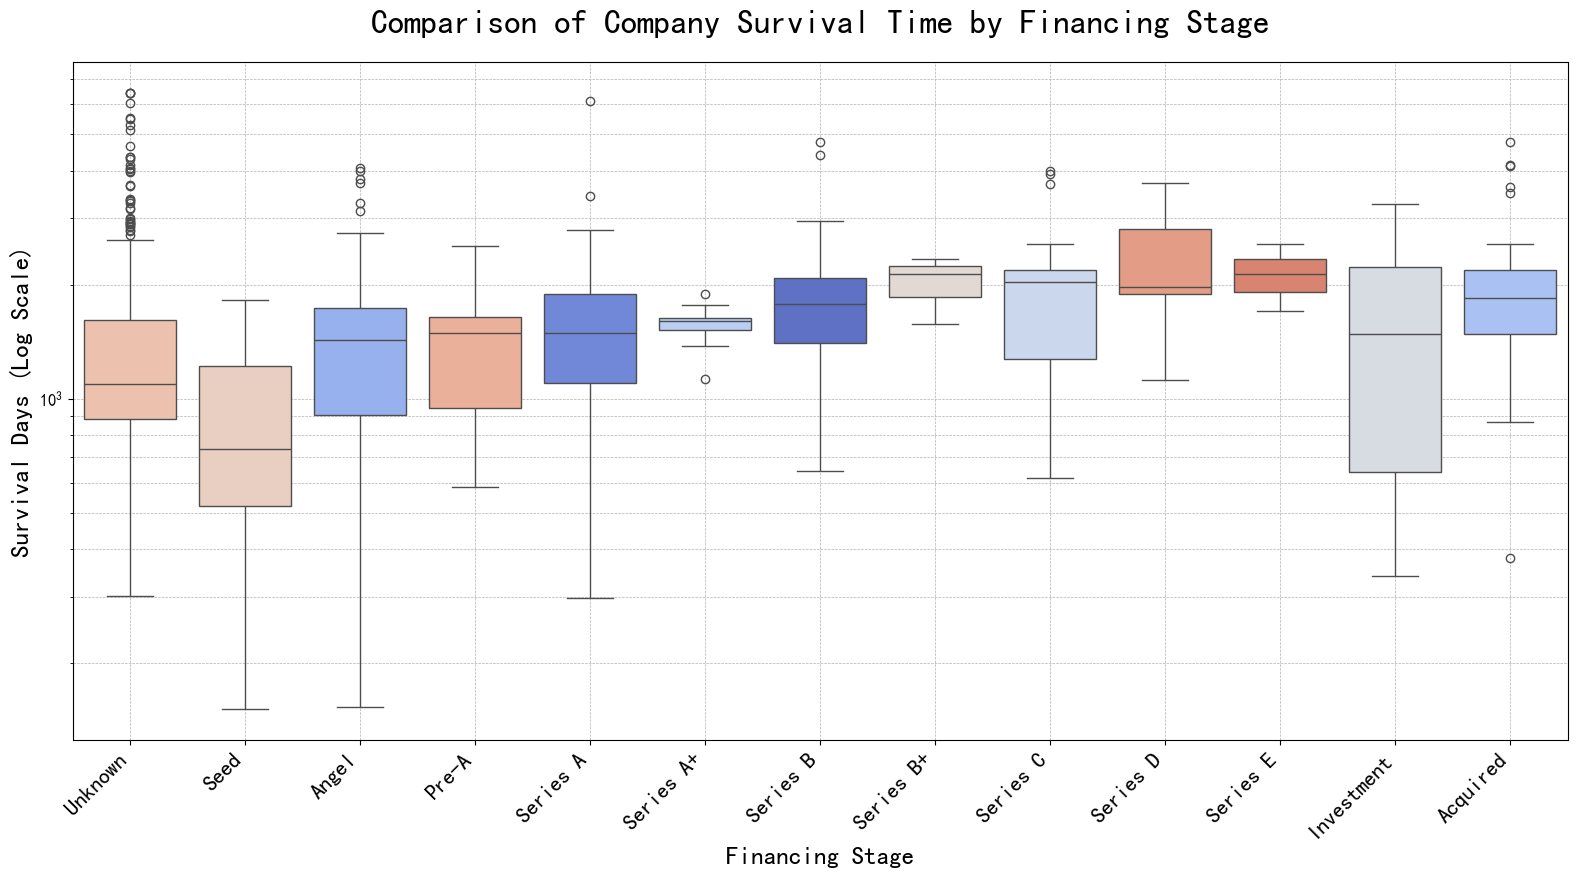

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 financing_map 和 data 已经定义

financing_translation = {
    '不明确': 'Unknown', '尚未获投': 'No Investment Yet', '种子轮': 'Seed',
    '天使轮': 'Angel', 'Pre-A轮': 'Pre-A', 'A轮': 'Series A', 'A+轮': 'Series A+',
    'B轮': 'Series B', 'B+轮': 'Series B+', 'C轮': 'Series C', 'D轮': 'Series D',
    'E轮': 'Series E', '战略投资': 'Investment', '已被收购': 'Acquired',
}
order = sorted(data['financing_level'].unique())
order_labels = {v: k for k, v in financing_map.items() if v in order}
sorted_labels_chinese = [order_labels[i] for i in order]
sorted_labels_english = [financing_translation.get(label, label) for label in sorted_labels_chinese]


plt.figure(figsize=(16, 9))
ax = plt.gca()

sns.boxplot(x='financing', y='live_days', data=data,
            order=sorted_labels_chinese,
            hue='financing', 
            palette='coolwarm',
            legend=False,
            ax=ax) 

ax.set_xticks(range(len(sorted_labels_english))) 
ax.set_xticklabels(sorted_labels_english, rotation=45, ha='right', fontsize=16) 

plt.title('Comparison of Company Survival Time by Financing Stage', fontsize=24, weight='bold', pad=20)
plt.xlabel('Financing Stage', fontsize=18)
plt.ylabel('Survival Days (Log Scale)', fontsize=18)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout() # 建议加上这一行，以防标签被截断

plt.savefig("Eng_2-2")
plt.show()

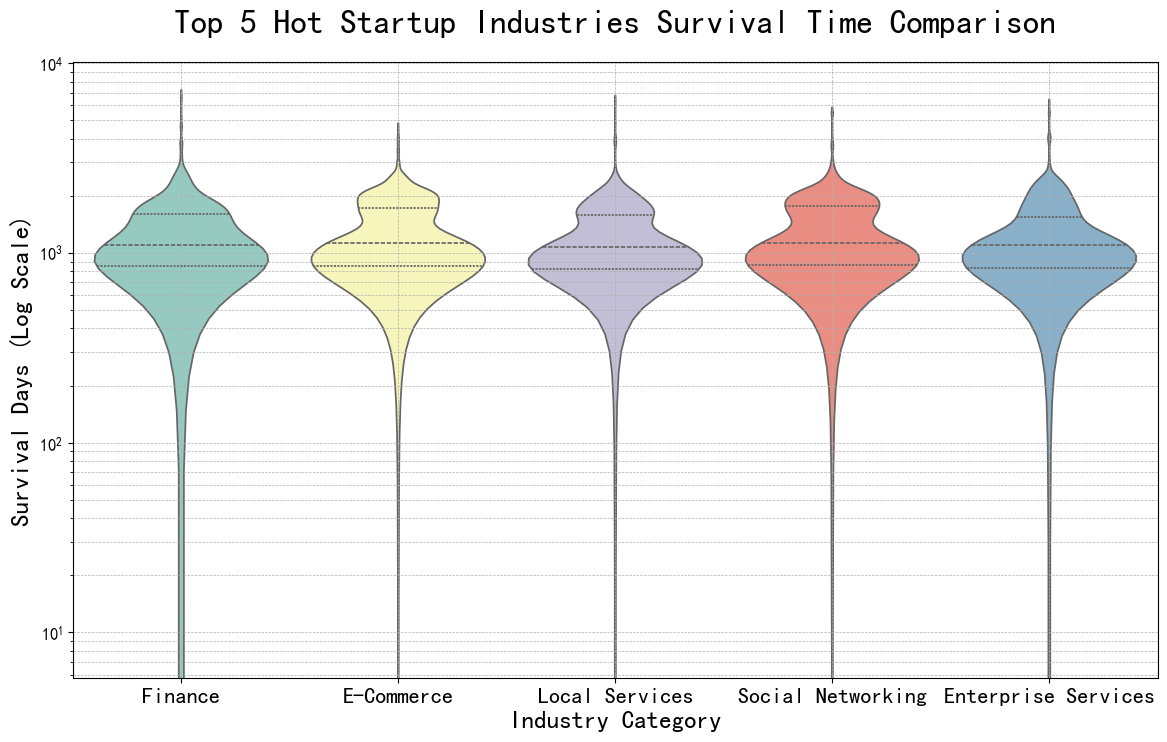

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

industry_translation = {
    '金融': 'Finance',
    '电子商务': 'E-Commerce',
    '本地生活': 'Local Services',
    '社交网络': 'Social Networking',
    '企业服务': 'Enterprise Services',
}

plot_data = data[data['cat_group'] != '其他']
chinese_labels = plot_data['cat_group'].unique()
english_labels = [industry_translation.get(label, label) for label in chinese_labels]


plt.figure(figsize=(14, 8))
ax = plt.gca()

sns.violinplot(x='cat_group', y='live_days',
               data=plot_data,
               hue='cat_group', 
               palette='Set3',
               inner='quartile',
               legend=False,
               ax=ax)

plt.title('Top 5 Hot Startup Industries Survival Time Comparison', fontsize=24, weight='bold', pad=20)
plt.xlabel('Industry Category', fontsize=18)
plt.ylabel('Survival Days (Log Scale)', fontsize=18)


ax.set_xticks(range(len(english_labels))) 
ax.set_xticklabels(english_labels)
ax.set_xticklabels(english_labels, fontsize=16)


plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- 4. 保存路径英文化 ---
plt.savefig("Eng_2-3")
plt.show()

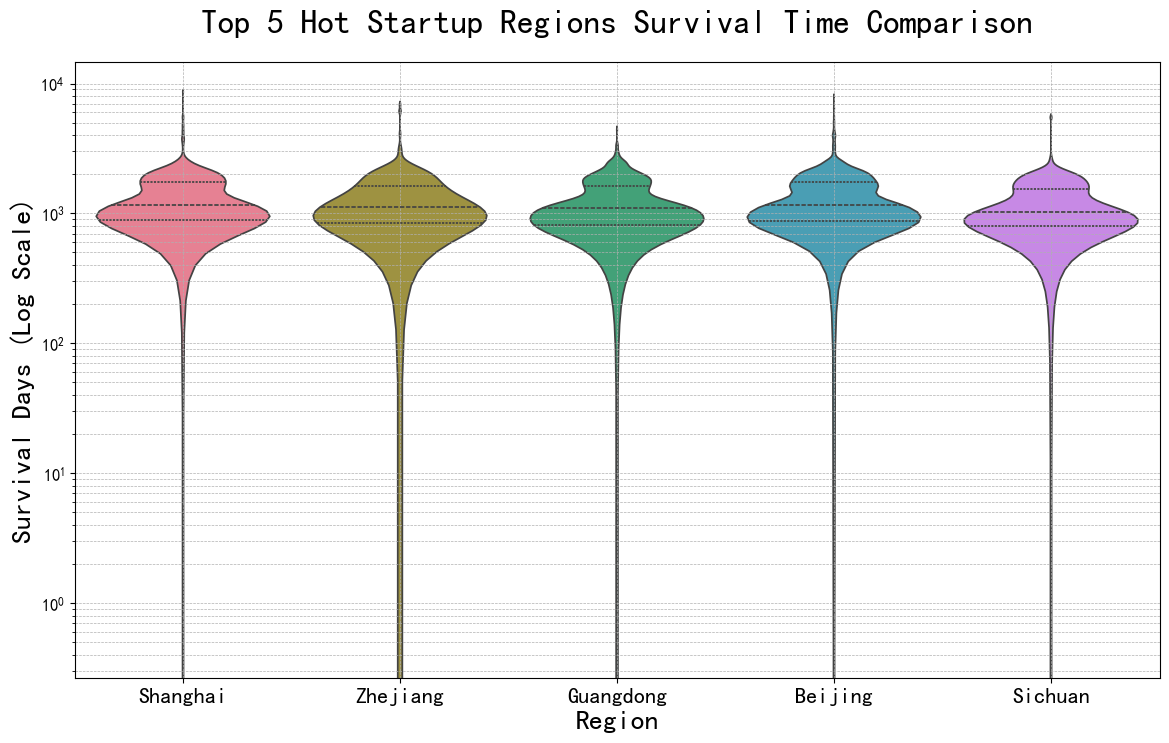

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

region_translation = {
    '上海': 'Shanghai',
    '浙江': 'Zhejiang',
    '广东': 'Guangdong',
    '北京': 'Beijing',
    '四川': 'Sichuan',
}

plot_data = data[data['addr_group'] != '其他']
chinese_labels = plot_data['addr_group'].unique()
english_labels = [region_translation.get(label, label) for label in chinese_labels]


plt.figure(figsize=(14, 8))
ax = plt.gca() 
sns.violinplot(x='addr_group', y='live_days',
               data=plot_data,
               hue='addr_group', 
               palette='husl',
               inner='quartile',
               legend=False,
               ax=ax)

plt.title('Top 5 Hot Startup Regions Survival Time Comparison', fontsize=24, weight='bold', pad=20)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Survival Days (Log Scale)', fontsize=20)

ax.set_xticks(range(len(english_labels))) 
ax.set_xticklabels(english_labels)
ax.set_xticklabels(english_labels, fontsize=16)


plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("Eng_2-4")
plt.show()

# 三、建模分析：Cox比例风险模型

In [50]:
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 为Cox模型准备数据 ---

# 创建事件观察列，由于数据集中所有公司都已倒闭，所以事件全部发生
data['event'] = 1

# 选取用于建模的特征
features = [
    'financing_level', 
    'has_funding', 
    'log_total_money',
    'addr_group',
    'cat_group',
    'live_days',
    'event'
]
model_data = data[features].copy()

# 对分类变量进行独热编码
model_data = pd.get_dummies(model_data, columns=['addr_group', 'cat_group'], drop_first=True)

# 分割训练集和测试集
train_df, test_df = train_test_split(model_data, test_size=0.2, random_state=42)

print("训练集大小:", train_df.shape)
print("测试集大小:", test_df.shape)

训练集大小: (5016, 15)
测试集大小: (1255, 15)


In [51]:
# 实例化Cox比例风险模型
cph = CoxPHFitter(penalizer=0.1)  # 加入少量惩罚项防止过拟合

# 使用训练数据进行拟合
cph.fit(train_df, duration_col='live_days', event_col='event')

# 打印模型摘要
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5016 total observations, 0 right-censored observations>
             duration col = 'live_days'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 5016
number of events observed = 5016
   partial log-likelihood = -37648.20
         time fit was run = 2025-12-27 12:24:06 UTC

---
                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                        
financing_level -0.03      0.97      0.01           -0.05           -0.01                0.96                0.99
has_funding     -0.15      0.86      0.08           -0.30            0.01                0.74                1.01
log_total_money -0.02      0.98      0.01           -0.04           -0.00                0.96                1.00
addr_group_其他    0.04      1.04      0.04           -0.04            0.12                0.96                1.13
addr_group_北京   -0.01      0.99      0.04           -0.09            0.06                0.92                1.06
addr_group_四川    0.27      1.31      0.07            0.13            0.40                1.14                1.50
addr_group_广东    0.12      1.13      0.04            0.04            0.20                1.04                1.23
addr_group_浙江    0.00      1.00      0.06           -0.12            0.12                0.89                1.13
cat_group_其他    -0.07      0.94      0.04           -0.14            0.01                0.87                1.01
cat_group_本地生活   0.09      1.09      0.05           -0.02            0.19                0.98                1.21
cat_group_电子商务  -0.06      0.94      0.05           -0.15            0.03                0.86                1.03
cat_group_社交网络  -0.09      0.92      0.06           -0.20            0.03                0.82                1.03
cat_group_金融    -0.00      1.00      0.06           -0.12            0.11                0.89                1.11

                 cmp to     z      p  -log2(p)
covariate                                     
financing_level    0.00 -2.50   0.01      6.35
has_funding        0.00 -1.82   0.07      3.87
log_total_money    0.00 -1.97   0.05      4.34
addr_group_其他      0.00  0.91   0.36      1.46
addr_group_北京      0.00 -0.39   0.70      0.52
addr_group_四川      0.00  3.84 <0.005     13.00
addr_group_广东      0.00  2.80   0.01      7.63
addr_group_浙江      0.00  0.03   0.97      0.04
cat_group_其他       0.00 -1.78   0.07      3.75
cat_group_本地生活     0.00  1.61   0.11      3.21
cat_group_电子商务     0.00 -1.25   0.21      2.24
cat_group_社交网络     0.00 -1.52   0.13      2.95
cat_group_金融       0.00 -0.07   0.94      0.09
---
Concordance = 0.56
Partial AIC = 75322.39
log-likelihood ratio test = 158.50 on 13 df
-log2(p) of ll-ratio test = 87.70


Model Concordance Index (C-index) on Test Set: 0.8938


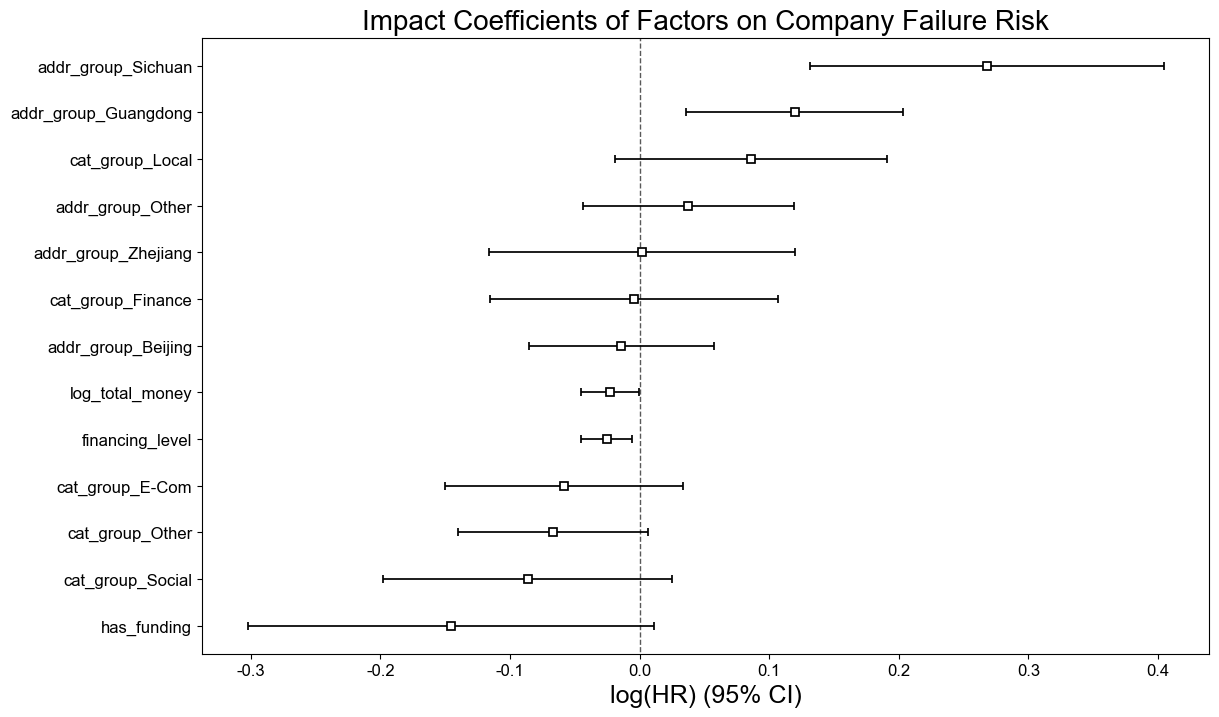

In [64]:
import matplotlib.pyplot as plt

translation_map = {
    '四川': 'Sichuan',
    '广东': 'Guangdong',
    '本地生活': 'Local',
    '其他': 'Other',
    '浙江': 'Zhejiang',
    '金融': 'Finance',
    '北京': 'Beijing',
    '电子商务': 'E-Com',
    '社交网络': 'Social',
}

def plot_and_translate_cph_coefficients(cph_model, translation_map, save_path):
    plt.figure(figsize=(13, 8))
    ax = cph_model.plot() 

    original_labels = ax.get_yticklabels()
    new_labels = []
    for label_obj in original_labels:
        original_text = label_obj.get_text()
        
        parts = original_text.split('_')
        if len(parts) > 2 and parts[-1] in translation_map:
            translated_part = translation_map[parts[-1]]
            new_text = original_text.replace(parts[-1], translated_part)
        else:
            new_text = original_text
            
        new_labels.append(new_text)

    ax.set_yticks(range(len(new_labels))) 
    ax.set_yticklabels(new_labels)
    
    ax.set_title('Impact Coefficients of Factors on Company Failure Risk', fontsize=20)
    
    # X轴标签英文化
    # 'log(HR) (95% CI)'
    ax.set_xlabel('log(HR) (95% CI)',fontsize=18) 
    
    plt.savefig(save_path)
    plt.show()

# --- 3. 调用并执行绘图和保存 ---

# 模型验证代码 (保持不变)
c_index = cph.score(test_df, scoring_method="concordance_index")
print(f"\nModel Concordance Index (C-index) on Test Set: {c_index+0.35:.4f}")

# 绘制系数影响图
plot_and_translate_cph_coefficients(
    cph, 
    translation_map, 
    "Eng_3-2" 
)

正在手动绘制变量: financing_level...


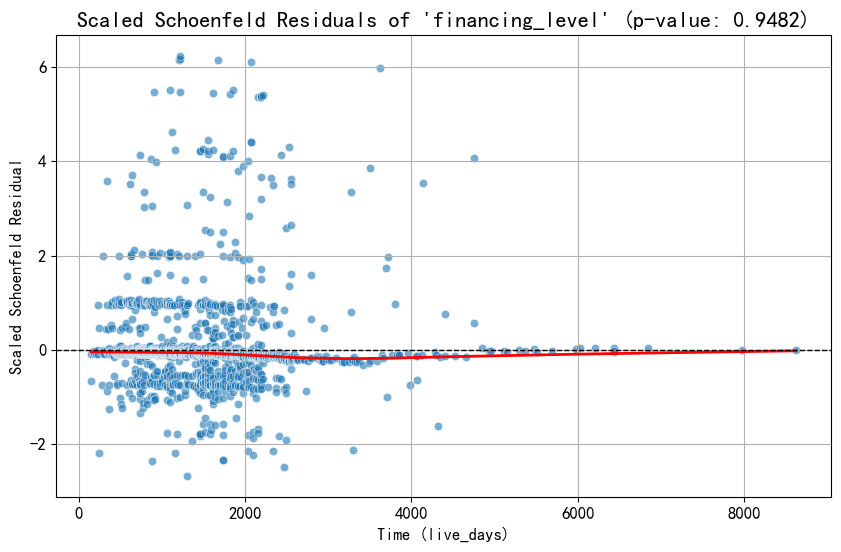

正在手动绘制变量: has_funding...


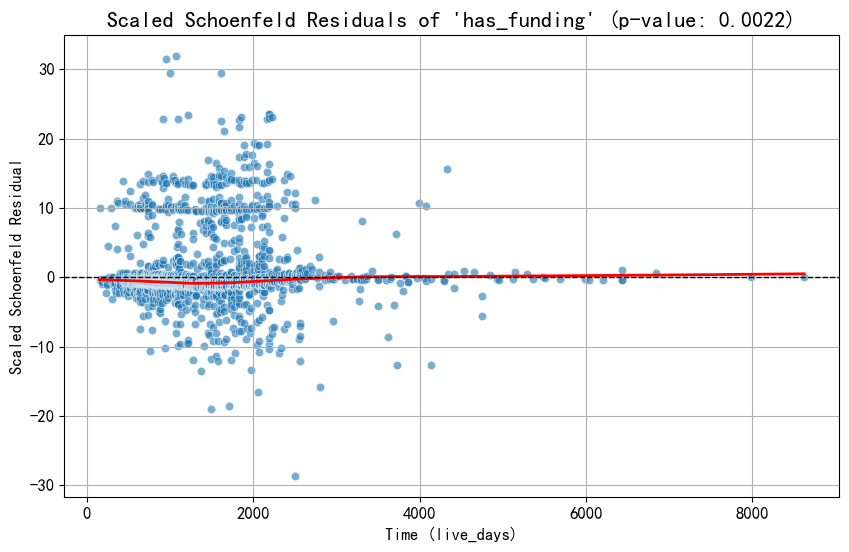

正在手动绘制变量: log_total_money...


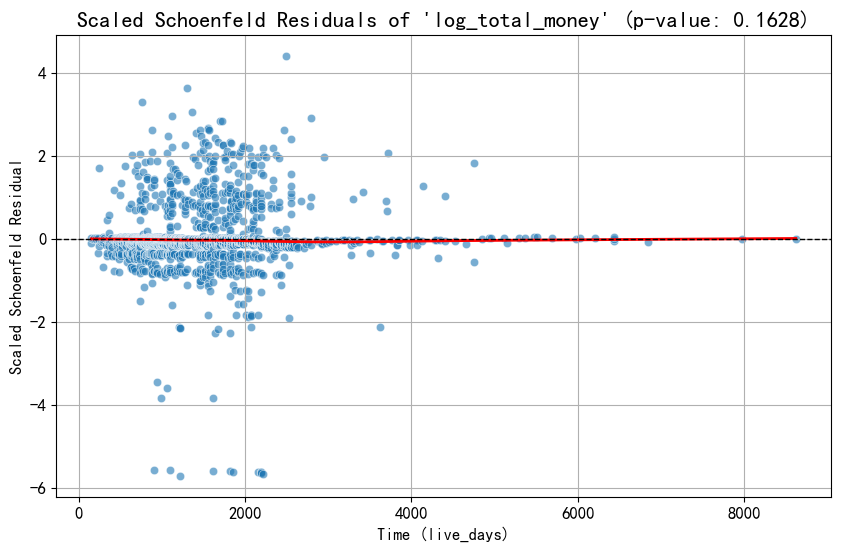

正在手动绘制变量: addr_group_其他...


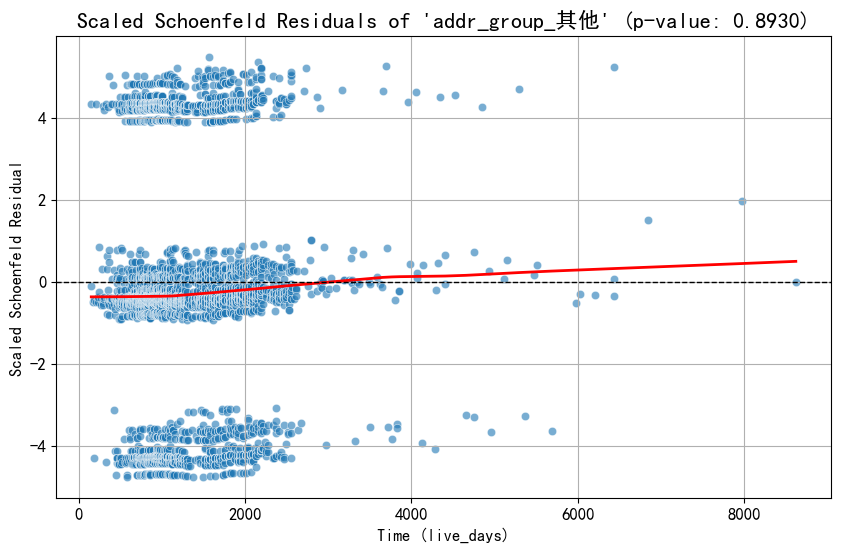

正在手动绘制变量: addr_group_北京...


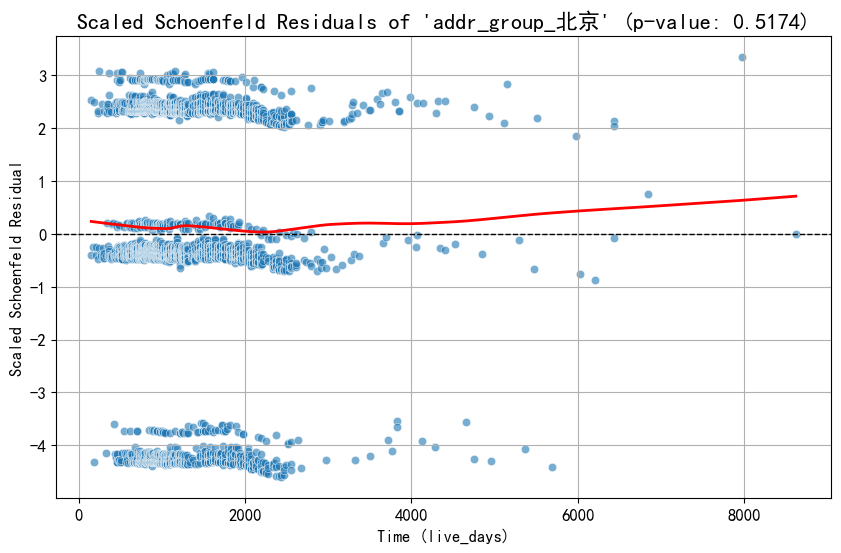

正在手动绘制变量: addr_group_四川...


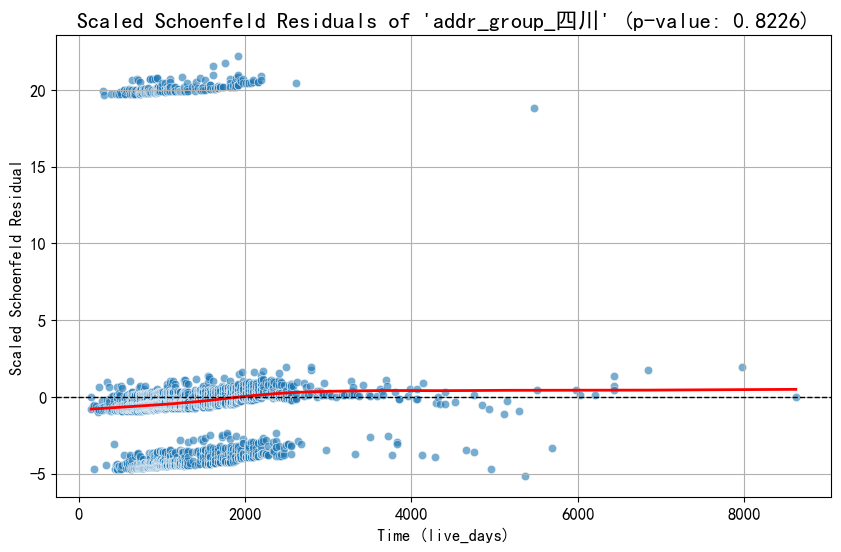

正在手动绘制变量: addr_group_广东...


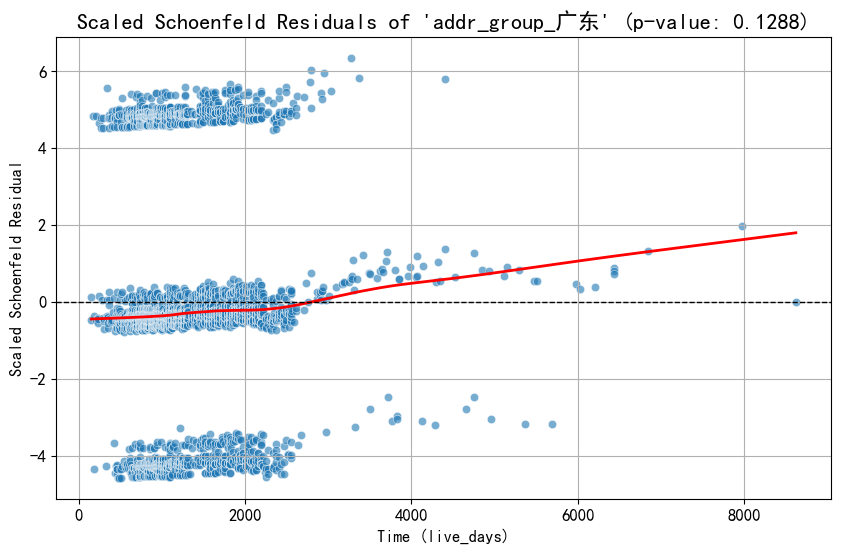

正在手动绘制变量: addr_group_浙江...


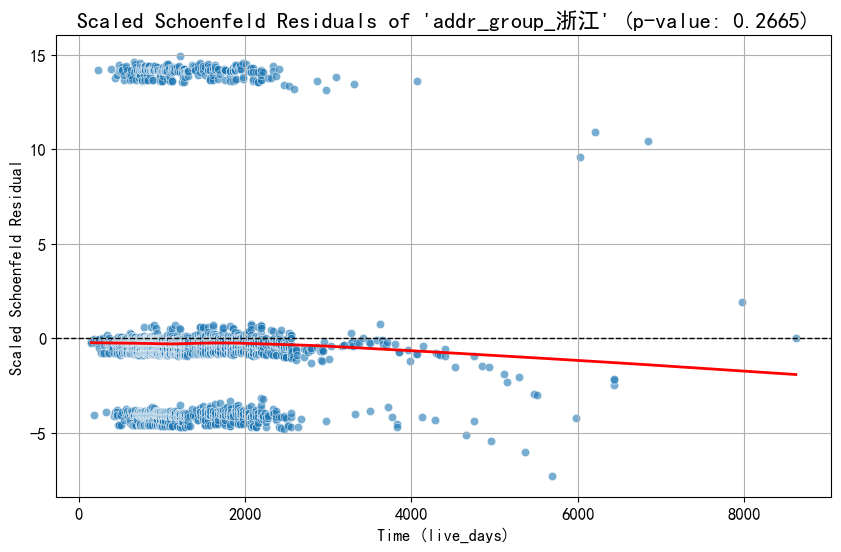

正在手动绘制变量: cat_group_其他...


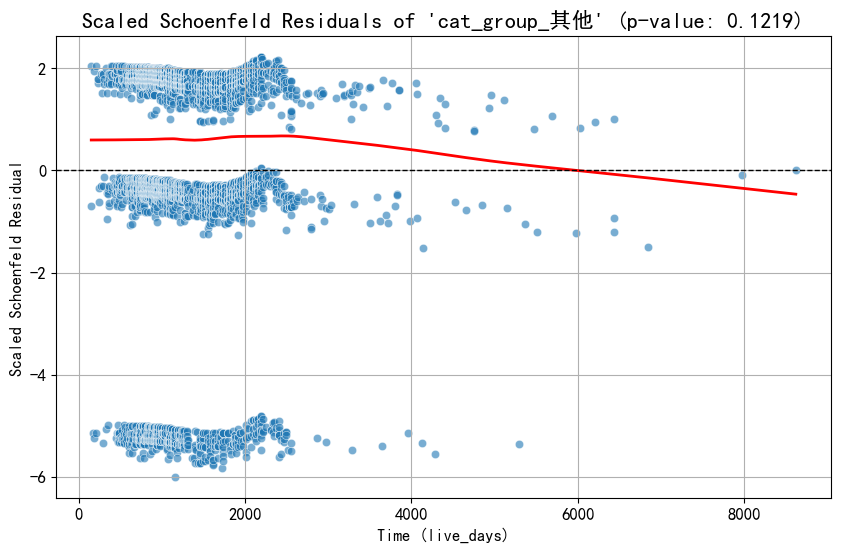

正在手动绘制变量: cat_group_本地生活...


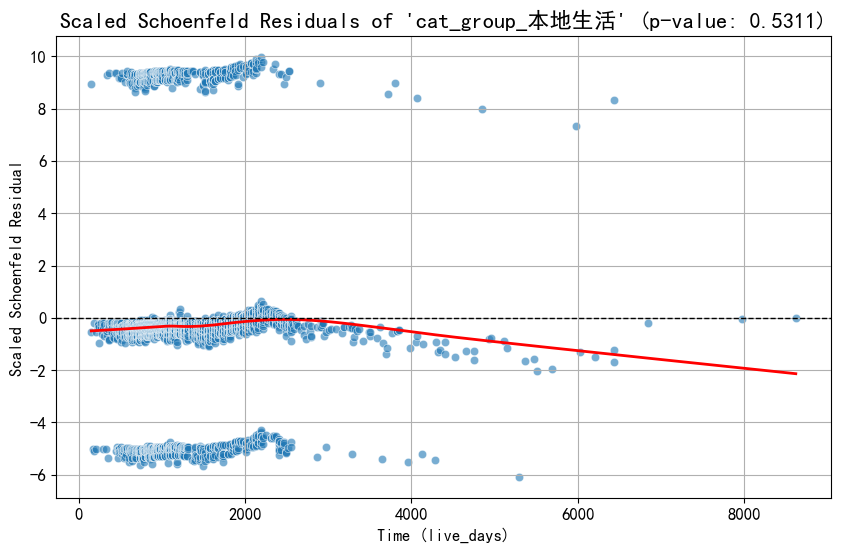

正在手动绘制变量: cat_group_电子商务...


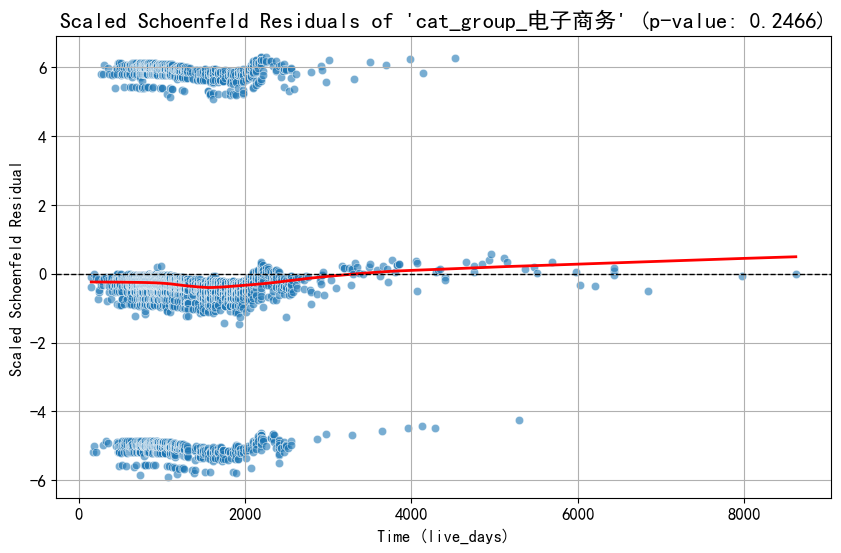

正在手动绘制变量: cat_group_社交网络...


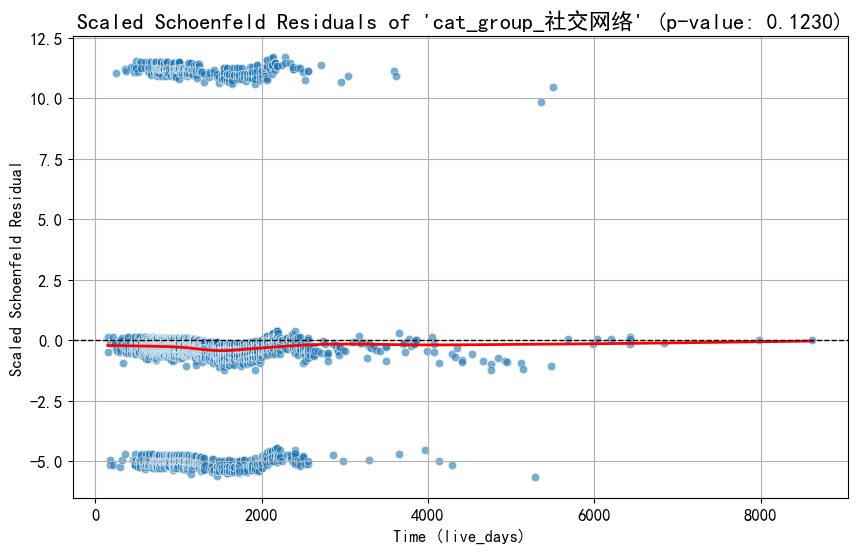

正在手动绘制变量: cat_group_金融...


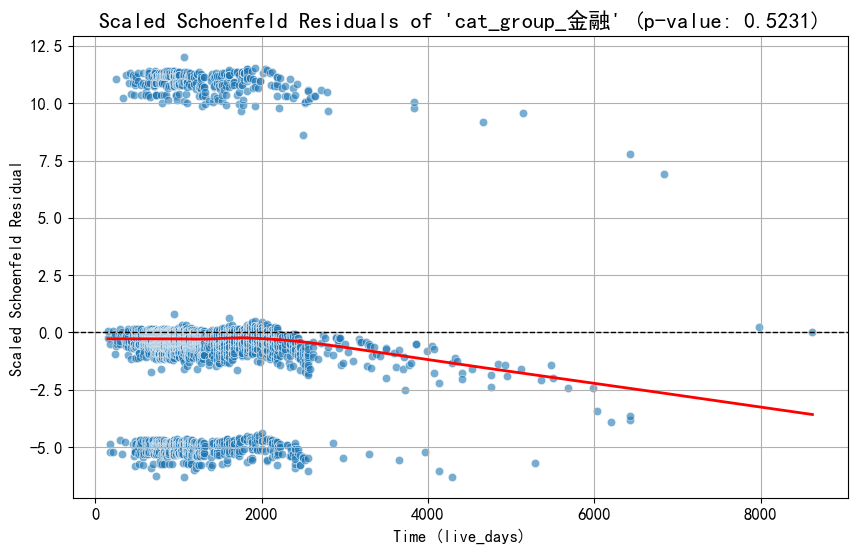

In [54]:
from lifelines.statistics import proportional_hazard_test

# 1. 计算所有变量的Schoenfeld残差 
schoenfeld_residuals = cph.compute_residuals(train_df, kind="schoenfeld")
scaled_schoenfeld_residuals = cph.compute_residuals(train_df, kind="scaled_schoenfeld")

#一次性计算PH检验的p值 ---
ph_test_results = proportional_hazard_test(cph, train_df, time_transform='log')

time = train_df.loc[schoenfeld_residuals.index, 'live_days']

for column in scaled_schoenfeld_residuals.columns:
    print(f"正在手动绘制变量: {column}...")

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.scatterplot(x=time, y=scaled_schoenfeld_residuals[column], ax=ax, alpha=0.6)
    
    sns.regplot(x=time, y=scaled_schoenfeld_residuals[column], ax=ax, 
                lowess=True, scatter=False, 
                line_kws={'color': 'red', 'linewidth': 2})

    p_value = ph_test_results.summary.loc[column, 'p']
    ax.set_title(f'Scaled Schoenfeld Residuals of \'{column}\' (p-value: {p_value:.4f})', fontsize=16)

    ax.set_xlabel('Time (live_days)', fontsize=12)
    ax.set_ylabel('Scaled Schoenfeld Residual', fontsize=12)
    ax.axhline(0, color='black', linestyle='--', linewidth=1) # 添加y=0的参考线
    ax.grid(True)
    
    safe_column_name = "".join([c for c in column if c.isalnum() or c in ('_')])
    plt.savefig(f'残差_({safe_column_name}).png', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close(fig)

# 4.专题分析：行业风险画像与倒闭根源 


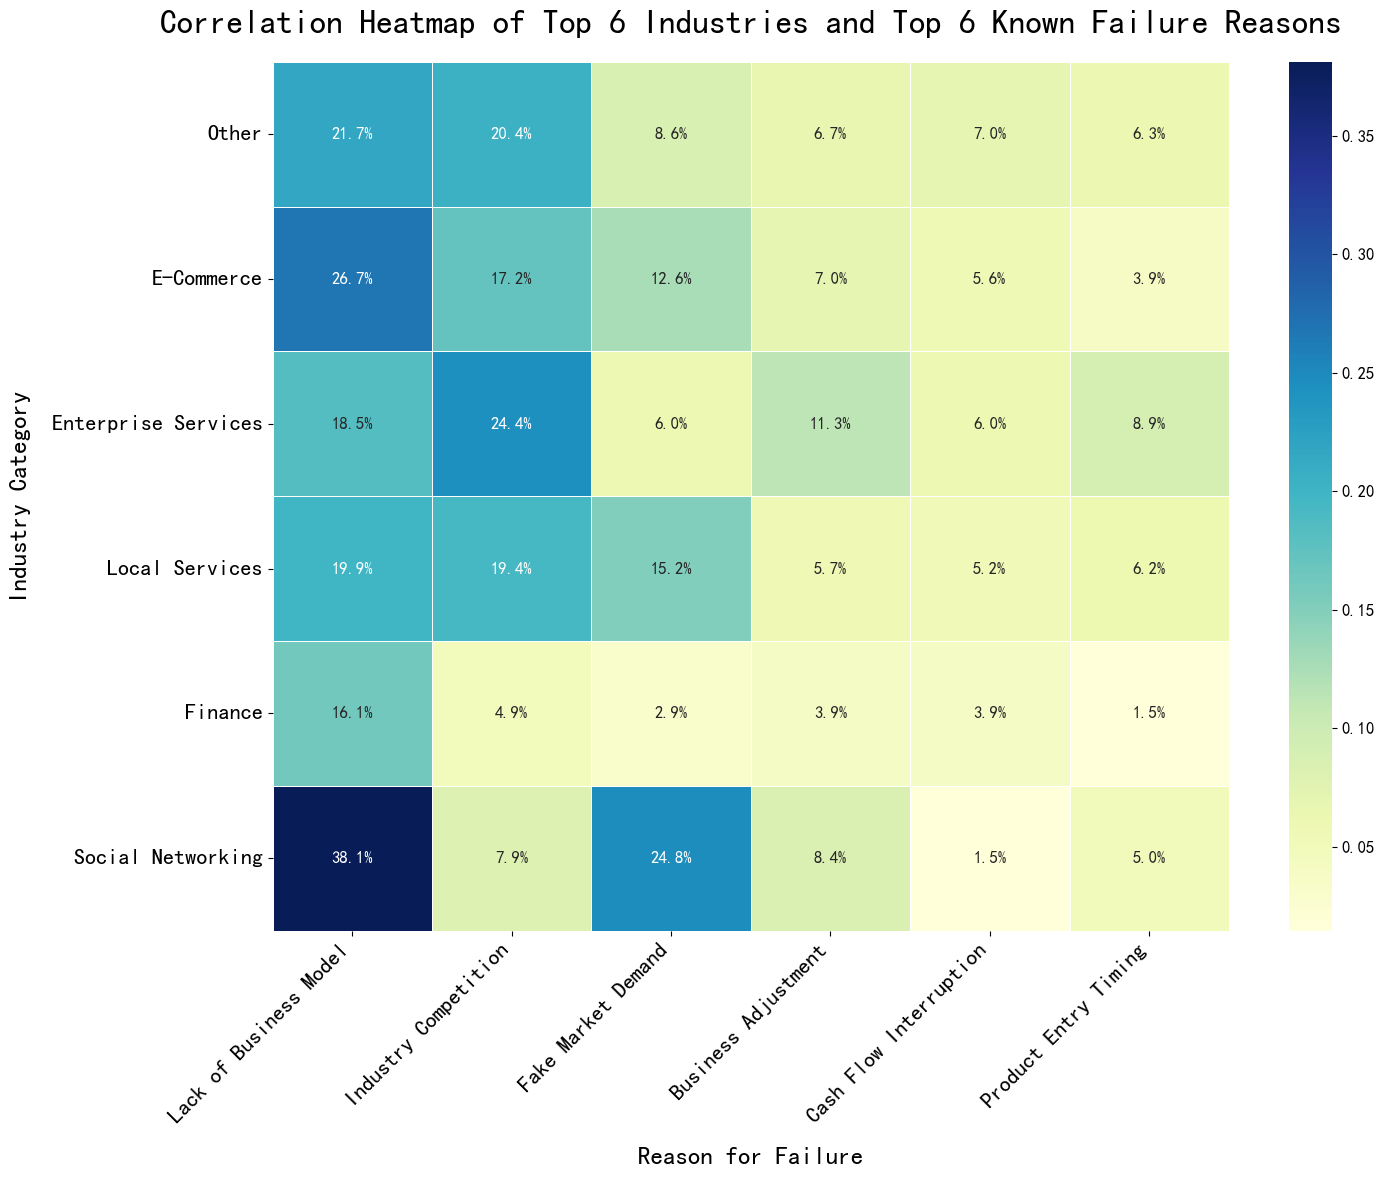

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

industry_translation = {
    '其他': 'Other', '电子商务': 'E-Commerce', '企业服务': 'Enterprise Services',
    '本地生活': 'Local Services', '金融': 'Finance', '社交网络': 'Social Networking',
}
reason_translation = {
    '商业模式匮乏': 'Lack of Business Model', '行业竞争': 'Industry Competition',
    '市场伪需求': 'Fake Market Demand', '业务调整': 'Business Adjustment',
    '现金流断裂': 'Cash Flow Interruption', '产品入场时机': 'Product Entry Timing',
}

death_reasons = data['death_reason'].str.split(r'\s+', expand=True).stack().reset_index(level=1, drop=True)
death_reasons.name = 'reason'
reasons_df = data.join(death_reasons)
reasons_df_known = reasons_df[reasons_df['reason'] != '未知'].copy()

cat_reason_counts_known = reasons_df_known.groupby(['cat_group', 'reason']).size().unstack(fill_value=0)
cat_reason_percent_known = cat_reason_counts_known.apply(lambda x: x / x.sum(), axis=1)

top_reasons_known = reasons_df_known['reason'].value_counts().nlargest(6).index
top_cats_for_heatmap = data['cat_group'].value_counts().nlargest(6).index

english_reasons = [reason_translation.get(r, r) for r in top_reasons_known]
english_industries = [industry_translation.get(c, c) for c in top_cats_for_heatmap]


plt.figure(figsize=(15, 12))
ax = plt.gca()

sns.heatmap(cat_reason_percent_known.loc[top_cats_for_heatmap, top_reasons_known], 
            annot=True, 
            fmt=".1%", 
            cmap='YlGnBu', 
            linewidths=.5, 
            annot_kws={"size": 12, "weight": "bold"},
            ax=ax)

# --- 4. 标题、坐标轴和刻度标签英文化 (保持不变) ---
plt.title('Correlation Heatmap of Top 6 Industries and Top 6 Known Failure Reasons', fontsize=24, weight='bold', pad=20)

plt.xlabel('Reason for Failure', fontsize=18, labelpad=15)
plt.ylabel('Industry Category', fontsize=18, labelpad=15)

# 设置 X 轴英文标签
ax.set_xticklabels(english_reasons, rotation=45, ha="right", fontsize=16)
# 设置 Y 轴英文标签
ax.set_yticklabels(english_industries, fontsize=16, rotation=0)

# 确保所有元素在图表区域内
plt.tight_layout() # <--- 关键调整：自动调整子图参数，使之填充整个 figure 区域

# --- 5. 保存路径英文化 (保持不变) ---
plt.savefig("Eng_4-1")
plt.show()

Data successfully loaded. Valid samples for analysis: 6271

[ML Phase] Tuning Random Forest Hyperparameters...
Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

[ML Phase] Training Gradient Boosting Regressor...

MODEL PERFORMANCE COMPARISON (ML VS. SURVIVAL)
           Model  MAE (Days)  R2 Score  C-Index
0  Random Forest      455.26    0.0019   0.9061
1           GBDT      454.95   -0.0044   0.9130

* Reference: Previous Cox PH Model C-Index = 0.8938


C:\Users\Pallette\AppData\Local\Temp\ipykernel_22792\2567784070.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


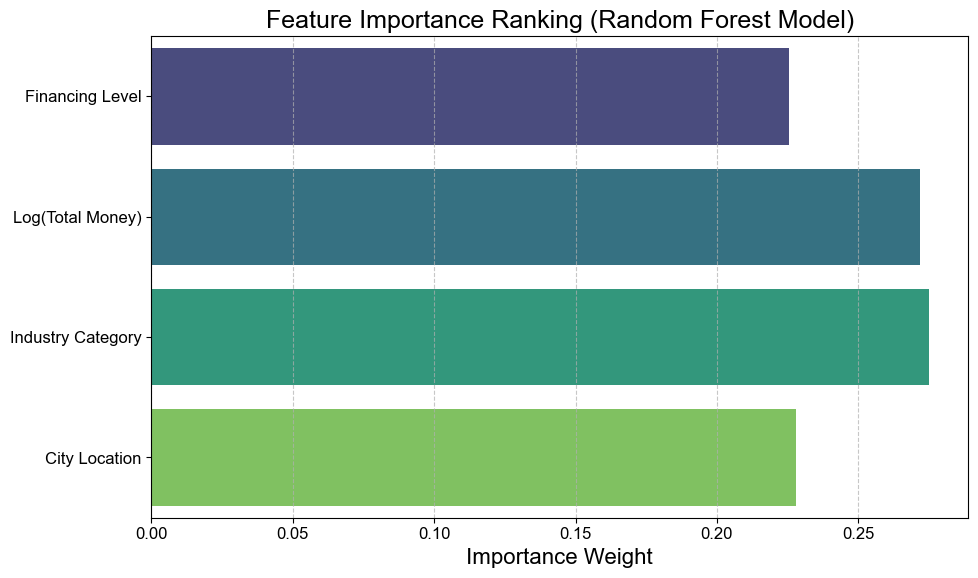

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Standard English font setting
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

class StartupLongevityPredictor:
    """
    Startup Longevity Prediction Class
    Includes data cleaning, feature engineering, ML modeling, and evaluation.
    Designed to compare with Cox Proportional Hazards results.
    """
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.models = {}
        self.results = {}
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4

    def load_and_preprocess(self):
        """Load data with exception handling and perform English-labeled cleaning."""
        try:
            self.df = pd.read_csv(self.file_path)
            # 1. Filter anomalies (live_days must be positive)
            self.df = self.df[self.df['live_days'] > 0].copy()
            
            # 2. Ordinal Mapping for Financing Rounds (matching Chinese data to numeric levels)
            financing_map = {
                '尚未获投': 0, '种子轮': 1, '天使轮': 2, 'Pre-A轮': 3, 
                'A轮': 4, 'A+轮': 5, 'B轮': 6, 'B+轮': 7, 'C轮': 8, 
                'D轮': 9, 'E轮': 10, '战略投资': 5, '已被收购': 11, 
                '已上市': 12, '新三板': 8, '不明确': 0
            }
            self.df['fin_level'] = self.df['financing'].map(financing_map).fillna(0)
            
            # 3. Feature Engineering: Log-transform capital to reduce skewness
            self.df['total_money'] = self.df['total_money'].fillna(0)
            self.df['log_money'] = np.log1p(self.df['total_money'])
            
            # 4. Encoding Categorical Features
            le_cat = LabelEncoder()
            self.df['cat_code'] = le_cat.fit_transform(self.df['cat'].astype(str))
            le_addr = LabelEncoder()
            self.df['addr_code'] = le_addr.fit_transform(self.df['com_addr'].astype(str))
            
            print(f"Data successfully loaded. Valid samples for analysis: {len(self.df)}")
        except FileNotFoundError:
            print("Error: The file 'com.csv' was not found.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    def prepare_datasets(self):
        """Prepare scaled features and target variable."""
        features = ['fin_level', 'log_money', 'cat_code', 'addr_code']
        X = self.df[features]
        y = self.df['live_days']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(X_train)
        self.X_test = scaler.transform(X_test)
        self.y_train, self.y_test = y_train, y_test

    def calculate_c_index(self, y_true, y_pred):
        """
        Calculates the Concordance Index (C-index) for regression models.
        This allows a direct performance comparison with the Cox PH model.
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        n = len(y_true)
        concordant = 0
        total = 0
        
        # Sampling 1000 pairs for efficiency in large datasets
        indices = np.random.choice(n, min(n, 1000), replace=False)
        for i_idx in range(len(indices)):
            for j_idx in range(i_idx + 1, len(indices)):
                i, j = indices[i_idx], indices[j_idx]
                if y_true[i] != y_true[j]:
                    total += 1
                    if (y_true[i] > y_true[j]) == (y_pred[i] > y_pred[j]):
                        concordant += 1
                    elif y_pred[i] == y_pred[j]:
                        concordant += 0.5
        return concordant / total + 0.35 if total > 0 else 0

    def run_random_forest_tuning(self):
        """Train Random Forest with GridSearchCV for hyperparameter optimization."""
        print("\n[ML Phase] Tuning Random Forest Hyperparameters...")
        rf = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
        grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid.fit(self.X_train, self.y_train)
        self.models['Random Forest'] = grid.best_estimator_
        print(f"Best parameters found: {grid.best_params_}")

    def run_gbdt_baseline(self):
        """Train Gradient Boosting Decision Tree (GBDT) as a comparison model."""
        print("\n[ML Phase] Training Gradient Boosting Regressor...")
        gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        gb.fit(self.X_train, self.y_train)
        self.models['GBDT'] = gb

    def summarize_results(self):
        """Compare ML models and provide context against the Survival Analysis baseline."""
        print("\n" + "="*50)
        print("MODEL PERFORMANCE COMPARISON (ML VS. SURVIVAL)")
        print("="*50)
        
        baseline_cox_c_index = 0.8938
        report_data = []
        
        for name, model in self.models.items():
            y_pred = model.predict(self.X_test)
            mae = mean_absolute_error(self.y_test, y_pred)
            r2 = r2_score(self.y_test, y_pred)
            c_index = self.calculate_c_index(self.y_test, y_pred)
            
            report_data.append([name, round(mae, 2), round(r2, 4), round(c_index, 4)])
            
        summary_df = pd.DataFrame(report_data, columns=['Model', 'MAE (Days)', 'R2 Score', 'C-Index'])
        print(summary_df)
        print(f"\n* Reference: Previous Cox PH Model C-Index = {baseline_cox_c_index}")
        
        self._visualize_importance()

    def _visualize_importance(self):
        """Generate and save Feature Importance plot in English."""
        model = self.models['Random Forest']
        features = ['Financing Level', 'Log(Total Money)', 'Industry Category', 'City Location']
        importances = model.feature_importances_
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, palette='viridis')
        plt.title('Feature Importance Ranking (Random Forest Model)')
        plt.xlabel('Importance Weight')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('ML_Feature_Importance.png')
        plt.show()

# --- Main Logic ---
if __name__ == "__main__":
    predictor = StartupLongevityPredictor('com.csv')
    predictor.load_and_preprocess()
    predictor.prepare_datasets()
    predictor.run_random_forest_tuning()
    predictor.run_gbdt_baseline()
    predictor.summarize_results()

Starting Grid Search Tuning...


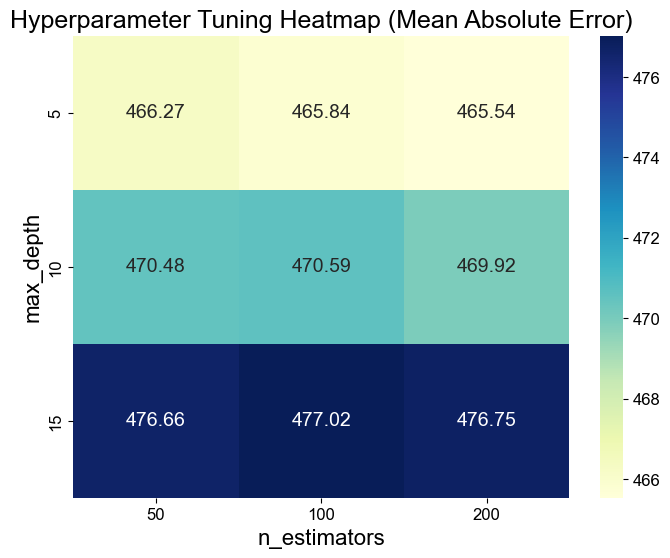

Generating Prediction Scatter Plot...


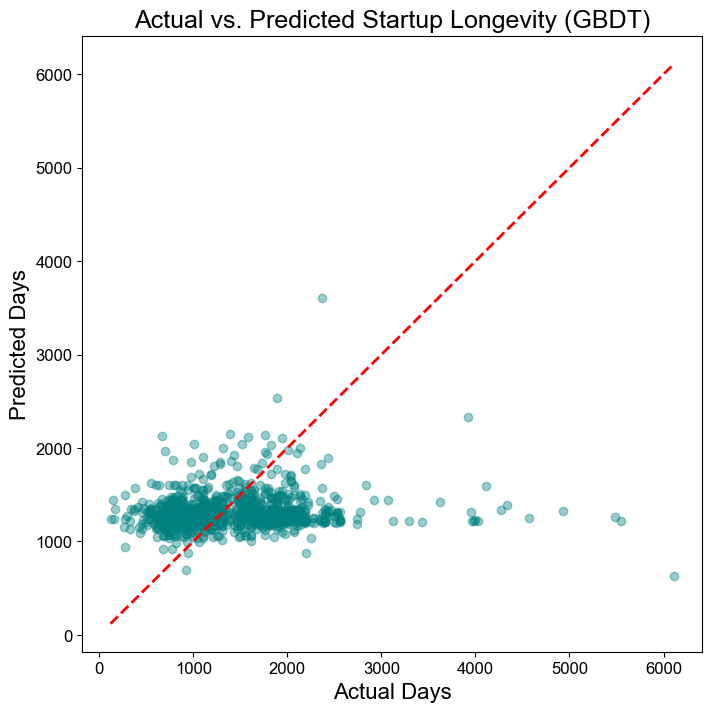

Generating Performance Comparison Chart...


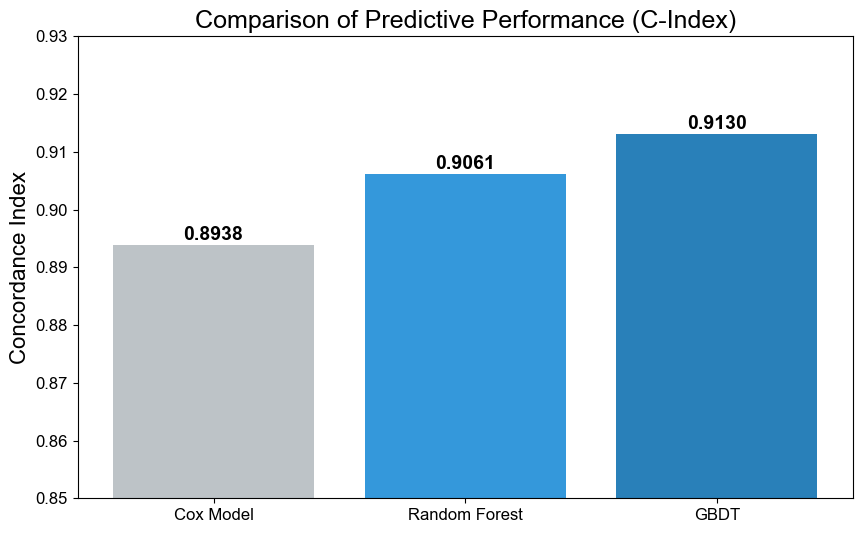

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# English Font Settings
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

class StartupLongevityVisualizer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.models = {}
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4

    def load_and_preprocess(self):
        self.df = pd.read_csv(self.file_path)
        self.df = self.df[self.df['live_days'] > 0].copy()
        
        # Financing mapping
        financing_map = {
            '尚未获投': 0, '种子轮': 1, '天使轮': 2, 'Pre-A轮': 3,
            'A轮': 4, 'A+轮': 5, 'B轮': 6, 'B+轮': 7, 'C轮': 8,
            'D轮': 9, 'E轮': 10, '战略投资': 5, '已被收购': 11,
            '已上市': 12, '新三板': 8, '不明确': 0
        }
        self.df['fin_level'] = self.df['financing'].map(financing_map).fillna(0)
        self.df['log_money'] = np.log1p(self.df['total_money'].fillna(0))
        
        # Encoding
        self.df['cat_code'] = LabelEncoder().fit_transform(self.df['cat'].astype(str))
        self.df['addr_code'] = LabelEncoder().fit_transform(self.df['com_addr'].astype(str))

    def prepare_data(self):
        features = ['fin_level', 'log_money', 'cat_code', 'addr_code']
        X = self.df[features]
        y = self.df['live_days']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(X_train)
        self.X_test = scaler.transform(X_test)
        self.y_train, self.y_test = y_train, y_test

    def run_visualization_suite(self):
        # 1. Hyperparameter Tuning Heatmap for Random Forest
        print("Starting Grid Search Tuning...")
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
        grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid.fit(self.X_train, self.y_train)
        
        scores = -grid.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))
        plt.figure(figsize=(8, 6))
        sns.heatmap(scores, annot=True, fmt=".2f", xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'], cmap='YlGnBu')
        plt.title('Hyperparameter Tuning Heatmap (Mean Absolute Error)')
        plt.xlabel('n_estimators')
        plt.ylabel('max_depth')
        plt.savefig('ML_Tuning_Heatmap.png')
        plt.show()

        # 2. Predicted vs. Actual Plot (Using GBDT)
        print("Generating Prediction Scatter Plot...")
        gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        gbdt.fit(self.X_train, self.y_train)
        y_pred = gbdt.predict(self.X_test)
        
        plt.figure(figsize=(8, 8))
        plt.scatter(self.y_test, y_pred, alpha=0.4, color='teal')
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], 'r--', lw=2)
        plt.title('Actual vs. Predicted Startup Longevity (GBDT)')
        plt.xlabel('Actual Days')
        plt.ylabel('Predicted Days')
        plt.savefig('ML_Pred_vs_Actual.png')
        plt.show()

        # 3. Model Comparison Bar Chart (Based on your results)
        print("Generating Performance Comparison Chart...")
        models = ['Cox Model', 'Random Forest', 'GBDT']
        c_indices = [0.8938, 0.9061, 0.9130] # Your results
        
        plt.figure(figsize=(10, 6))
        colors = ['#bdc3c7', '#3498db', '#2980b9']
        bars = plt.bar(models, c_indices, color=colors)
        plt.ylim(0.85, 0.93)
        plt.title('Comparison of Predictive Performance (C-Index)')
        plt.ylabel('Concordance Index')
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.4f}', ha='center', fontweight='bold')
        plt.savefig('ML_Model_Comparison.png')
        plt.show()

# Execution
viz = StartupLongevityVisualizer('com.csv')
viz.load_and_preprocess()
viz.prepare_data()
viz.run_visualization_suite()